In [1]:
import sys
sys.path.append("../")
from src.dictionary import dict_from_h5
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams["font.family"] = "Arial"
mpl.rcParams['figure.dpi'] = 300

In [2]:
item_dict_level1 = dict_from_h5(path="../data/embeddings/hetrec_gpt3_embed_level1.h5")
item_dict_level2 = dict_from_h5(path="../data/embeddings/hetrec_gpt3_embed_level2.h5")
item_dict_level3 = dict_from_h5(path="../data/embeddings/hetrec_gpt3_embed_level3.h5")
item_dict_level3_pp = dict_from_h5(path="../data/embeddings/hetrec_gpt3_embed_level4.h5")

In [3]:
import h5py

with h5py.File("../data/embeddings/hetrec_gpt3_embed_level4.h5") as f:
    print(f["Combined"][0].decode("utf-8"))

Toy 

 1995 

 Animation  

 animated animation classic  computer animation disney  pixar tim allen travel tom hanks toys 

 Annie Potts Farmer Rickles Erik von Detten Greg Berg Angel Jan Rabson Varney Joan Cusack Ranft Morris Ratzenberger Kendall Cunningham Laurie Metcalf Pinney Penn Jillette Proctor R. Ermey Freeman McAfee Sherry Lynn  Hanks Wallace Shawn 

 Lasseter 

 

 Toy Story is a 1995 computer - animated by Pixar Animation and by Walt Disney . The first installment in the  Toy Story franchise it was the first entirely computer - animated as well as the first from Pixar . It was by Lasseter ( in his directorial ) and by Bonnie Arnold and Guggenheim from a written by Joss Whedon Stanton Joel Cohen and Alec Sokolow and a by Lasseter Stanton Pete Docter and Ranft . The by Randy Newman and was executive - by Jobs and Edwin Catmull . The features the voices of Hanks Allen Rickles Varney Wallace Shawn Ratzenberger Annie Potts R. Ermey Morris Laurie Metcalf and Erik von Detten . 
 Ta

In [4]:
level1_embed = item_dict_level1.embeddings
level2_embed = item_dict_level2.embeddings
level3_embed = item_dict_level3.embeddings
level3_embed_pp = item_dict_level3_pp.embeddings

In [5]:
def get_distribution(embeddings: np.ndarray) -> np.ndarray: 
    sim = embeddings @ embeddings.T
    tri = np.tril(sim)
    np.fill_diagonal(tri, 0)
    nonzero = tri[np.nonzero(tri>0)]
    
    return nonzero

level1_dist = get_distribution(level1_embed)
level2_dist = get_distribution(level2_embed)
level3_dist = get_distribution(level3_embed)
level3_dist_pp = get_distribution(level3_embed_pp)

means = [level1_dist.mean(), level2_dist.mean(), level3_dist.mean(), level3_dist_pp.mean()]

In [66]:
colors = sns.color_palette("colorblind", 4)
colors

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0)]

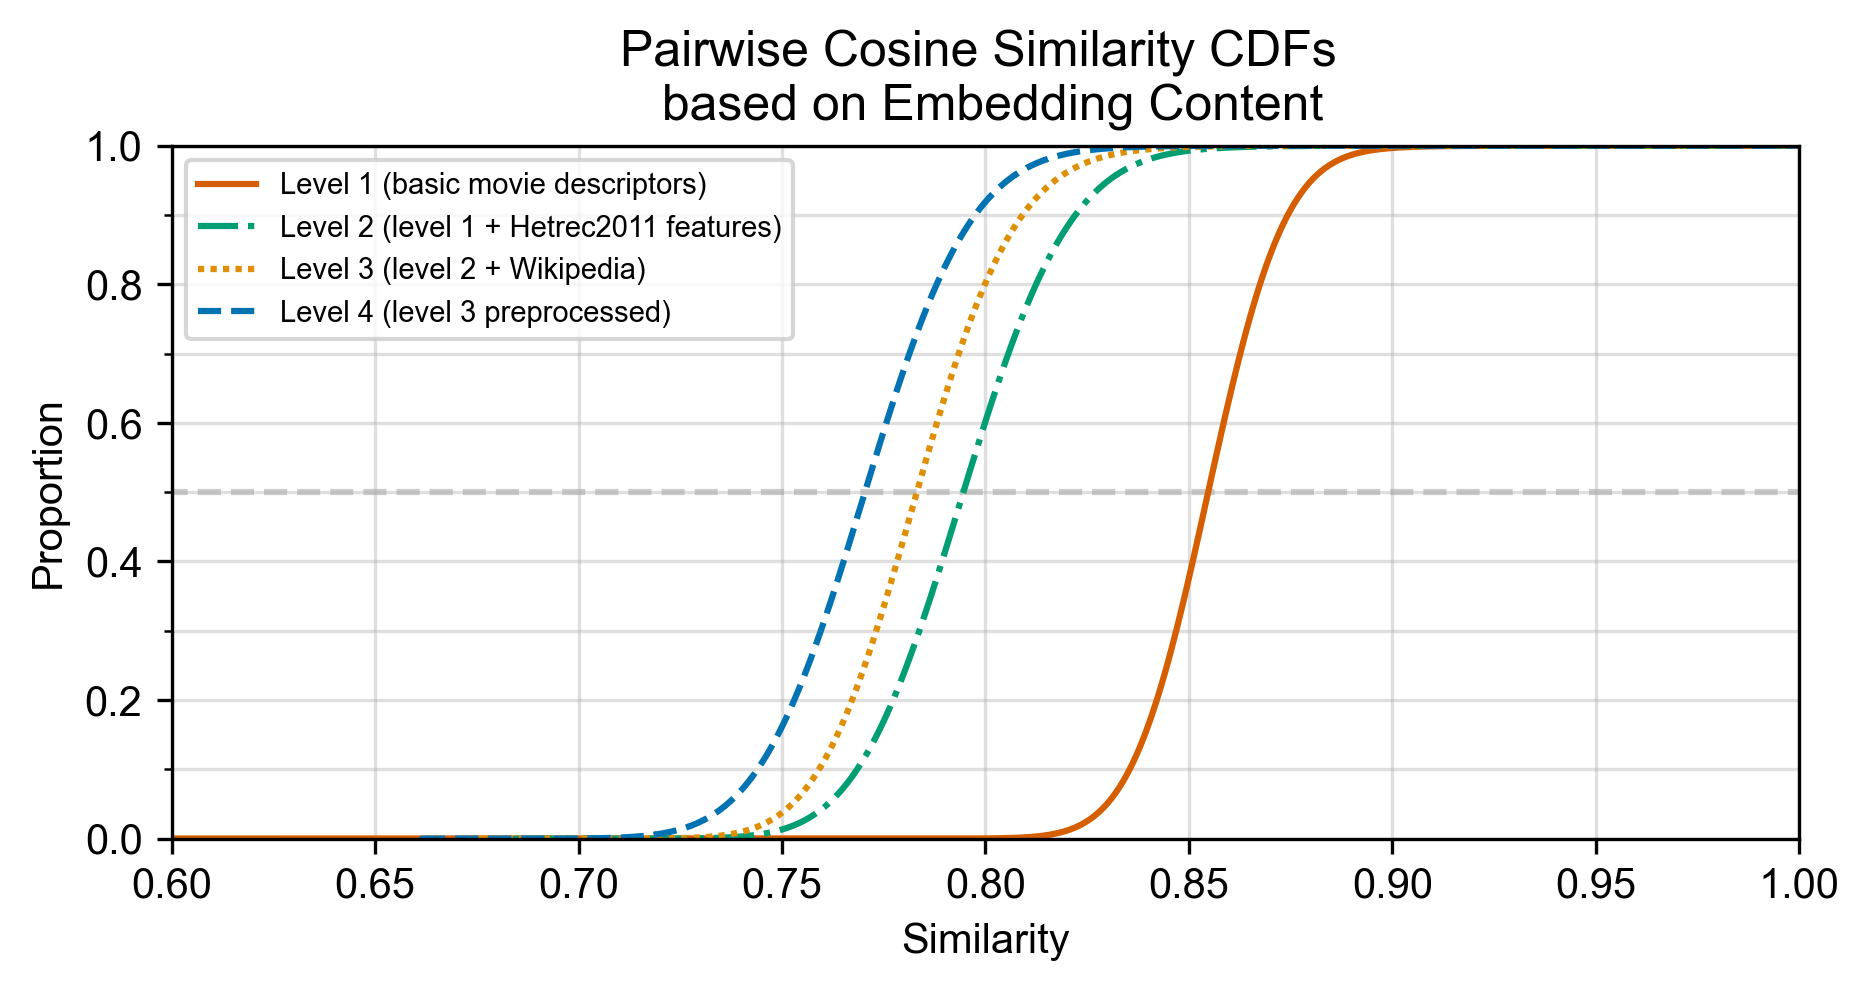

In [70]:
amount = None
fig, ax = plt.subplots(1, figsize=(7,3))
#sns.set_style("white")
sns.ecdfplot(level1_dist[:amount], ax=ax, color=colors[-1], label="Level 1 (basic movie descriptors)", )
sns.ecdfplot(level2_dist[:amount], ax=ax, color=colors[-2], label="Level 2 (level 1 + Hetrec2011 features)", linestyle="dashdot")
sns.ecdfplot(level3_dist[:amount], ax=ax, color=colors[-3], label="Level 3 (level 2 + Wikipedia)", linestyle=(0, (1, 1)))
sns.ecdfplot(level3_dist_pp[:amount], ax=ax, color=colors[-4], label="Level 4 (level 3 preprocessed)", linestyle="dashed")
plt.hlines([0.5], 0, 1, linestyle="--", color="black", alpha=0.2, zorder=0)
#ax.tick_params(axis="both", which="both", length=20)
#plt.vlines(means, ymin=0, ymax=28, linestyle="--", colors=[colors[0], colors[3], colors[5], colors[7]])
#plt.ylim((0, 28))
plt.xlim(0.6, 1)
plt.yticks(np.arange(0, 1.1, 0.1), minor=True)
plt.ylim(0, 1)
plt.legend(loc="best", fontsize=7)
plt.xlabel("Similarity")
plt.title("Pairwise Cosine Similarity CDFs \n based on Embedding Content")
plt.grid(axis="both", which="both", alpha=0.4)
plt.savefig("similarity_ecdf.pdf", bbox_inches="tight")
plt.show()

# Checking Most Related Items for One Item

In [60]:
import h5py
with h5py.File("./data/embeddings/hetrec_gpt3_embed_level1.h5") as f:
    titles = f["MovieTitle"][:]
    years = f["ReleaseYear"][:]

for i, t in enumerate(titles):
    print(i, t)

0 b'Toy story'
1 b'Jumanji'
2 b'Grumpy Old Men'
3 b'Waiting to Exhale'
4 b'Father of the Bride Part II'
5 b'Heat'
6 b'Sabrina'
7 b'Tom and Huck'
8 b'Sudden Death'
9 b'GoldenEye'
10 b'The American President'
11 b'Dracula: Dead and Loving It'
12 b'Balto'
13 b'Nixon'
14 b'Cutthroat Island'
15 b'Casino'
16 b'Sense and Sensibility'
17 b'Four Rooms'
18 b'Ace Ventura: When Nature Calls'
19 b'Money Train'
20 b'Get Shorty'
21 b'Copycat'
22 b'Ninja Assassin'
23 b'Powder'
24 b'Leaving Las Vegas'
25 b'Othello'
26 b'Now and Then'
27 b'Persuasion'
28 b'La cit\xc3\xa9 des enfants perdus'
29 b'Yao a yao yao dao waipo qiao'
30 b'Dangerous Minds'
31 b'Twelve Monkeys'
32 b'Wings of Courage'
33 b'Babe'
34 b'Carrington'
35 b'Dead Man Walking'
36 b'Across the Sea of Time'
37 b'It Takes Two'
38 b'Clueless'
39 b'Cry, the Beloved Country'
40 b'Richard III'
41 b'Dead Presidents'
42 b'Restoration'
43 b'Mortal Kombat'
44 b'Live Free or Die Hard'
45 b'How to Make an American Quilt'
46 b'Shichinin no samurai'
47 b'

In [72]:
def get_top_k(item_embed, all_embed, titles, k):
    sim = item_embed @ all_embed.T
    sort = np.argsort(sim)[::-1][:k+1]
    return [i.decode("utf-8") for i in np.array(titles)[sort]]


index=9973
k=10

print(titles[index])
print(get_top_k(level1_embed[index], level1_embed, titles, k), "\n")
print(get_top_k(level2_embed[index], level2_embed, titles, k), "\n")
print(get_top_k(level3_embed[index], level3_embed, titles, k), "\n")
print(get_top_k(level3_embed_pp[index], level3_embed_pp, titles, k), "\n")

b'Pineapple Express'
['Pineapple Express', 'The Express', 'Pin', 'Tropic Thunder', 'Piñero', 'Blueberry', 'The Island', 'P2', 'Mystic Pizza', 'Domino', 'Juice'] 

['Pineapple Express', "Smokin' Aces", 'Crossover', 'Spanglish', 'Taxi', 'Underclassman', 'I Spy', 'The United States of Leland', 'Fast Track', 'Cop Land', 'Made'] 

['Pineapple Express', 'Postal', 'Half Baked', 'Tropic Thunder', 'Juice', 'Trees Lounge', 'Kingpin', 'Spun', 'The Express', "Smokin' Aces", 'Harold & Kumar Go to White Castle'] 

['Pineapple Express', 'Half Baked', 'Harold & Kumar Go to White Castle', 'Up in Smoke', 'Spun', 'Postal', 'Harold & Kumar Go to White Castle', 'Blow', 'Tropic Thunder', 'Trees Lounge', 'American Pie'] 

